In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
data_ori = pd.read_csv('./dataset/creditcard.csv')
new_data_ori = pd.read_csv('./dataset/new_creditcard.csv')

In [3]:
data = data_ori.copy()
new_data = new_data_ori.copy()

In [4]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

sc = StandardScaler()
rb = RobustScaler()
mn = MinMaxScaler()

data['Amount'] = rb.fit_transform(data['Amount'].values.reshape(-1, 1))
data['Time'] = mn.fit_transform(data['Time'].values.reshape(-1, 1))

new_data['Amount'] = rb.fit_transform(new_data['Amount'].values.reshape(-1, 1))
new_data['Time'] = mn.fit_transform(new_data['Time'].values.reshape(-1, 1))

data.drop_duplicates(inplace=True)
new_data.drop_duplicates(inplace=True)

### Feature Selection

In [5]:
data_sf = data[['V16', 'V14', 'V12', 'V9', 'V8', 'V4', 'V11', 'V10', 'Class']]
new_sf = new_data[['V18', 'V16','V14', 'V12', 'V10', 'V5', 'V4', 'V3', 'V2', 'V17', 'V11','Class']]

In [6]:
print(data_sf.shape)
print(new_sf.shape)

(283726, 9)
(567549, 12)


# data_sf 모델 비교

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = data_sf.iloc[:,:-1]
Y = data_sf.iloc[:,-1]

In [9]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=2)
predicted = clf.fit_predict(X)
predicted

array([1, 1, 1, ..., 0, 1, 0])

In [10]:
from sklearn.metrics import classification_report
print(classification_report(Y, predicted))

              precision    recall  f1-score   support

           0       1.00      0.49      0.66    283253
           1       0.00      0.96      0.01       473

    accuracy                           0.49    283726
   macro avg       0.50      0.73      0.33    283726
weighted avg       1.00      0.49      0.66    283726



In [11]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

In [12]:
# New_df is from the random undersample data (fewer instances)
X = data_sf.drop('Class', axis=1)
y = data_sf['Class']

In [13]:
# # T-SNE Implementation
# t0 = time.time()
# X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
# t1 = time.time()
# print("T-SNE took {:.2} s".format(t1 - t0))

In [14]:
# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

PCA took 0.42 s


In [15]:
# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

Truncated SVD took 0.49 s


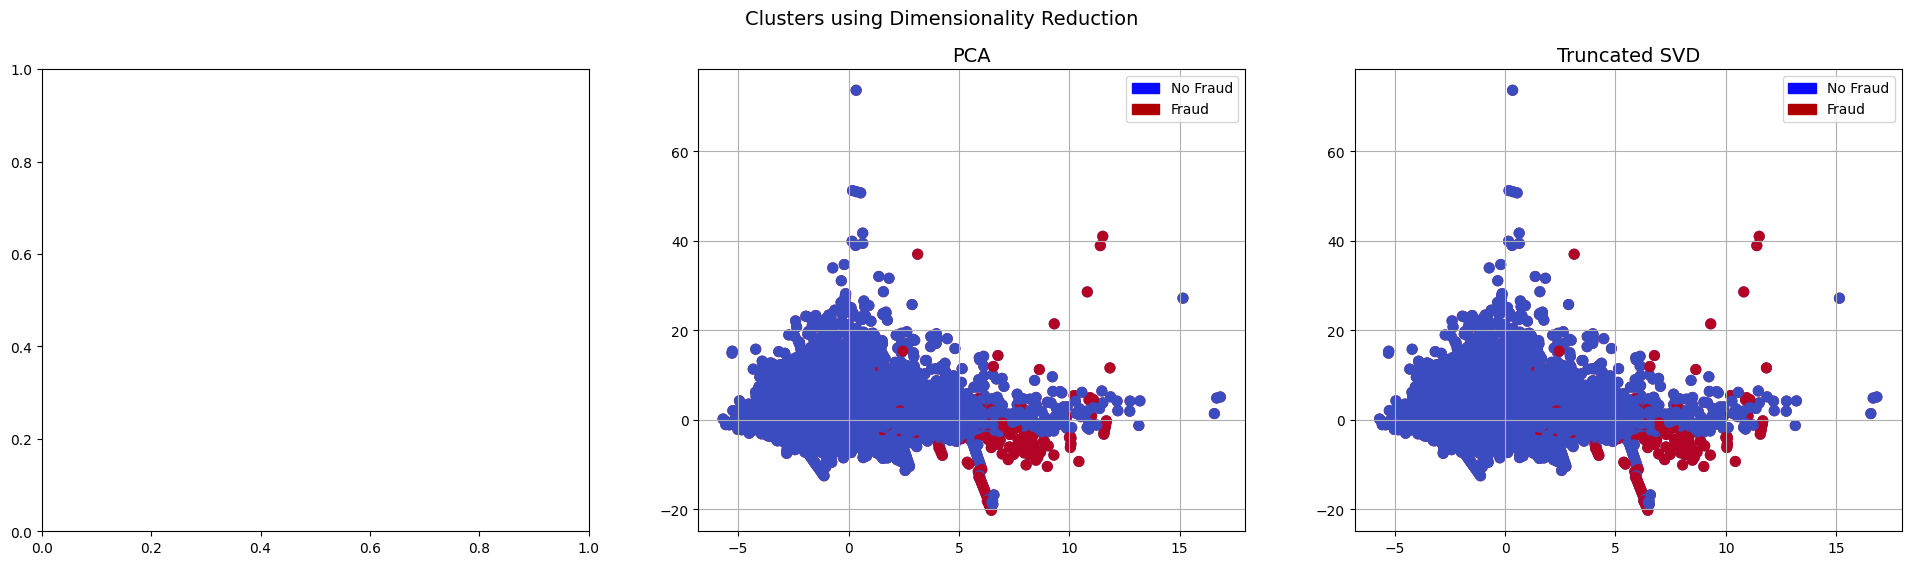

In [16]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


# # t-SNE scatter plot
# ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
# ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
# ax1.set_title('t-SNE', fontsize=14)

# ax1.grid(True)

# ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

# new_sf 모델 비교

In [17]:
X = new_sf.iloc[:,:-1]
Y = new_sf.iloc[:,-1]

In [18]:
clf = KMeans(n_clusters=2)
predicted = clf.fit_predict(X)
predicted

array([0, 0, 0, ..., 0, 0, 0])

In [19]:
print(classification_report(Y, predicted))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    283253
           1       1.00      0.98      0.99    284296

    accuracy                           0.99    567549
   macro avg       0.99      0.99      0.99    567549
weighted avg       0.99      0.99      0.99    567549



In [20]:
clf = KMeans(n_clusters=3)
predicted = clf.fit_predict(X)
predicted

array([1, 1, 1, ..., 1, 1, 1])

In [21]:
print(classification_report(Y, predicted))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00    283253
           1       0.01      0.01      0.01    284296
           2       0.00      0.00      0.00         0

    accuracy                           0.01    567549
   macro avg       0.00      0.00      0.00    567549
weighted avg       0.01      0.01      0.01    567549



In [22]:
# New_df is from the random undersample data (fewer instances)
X = new_sf.drop('Class', axis=1)
y = new_sf['Class']

In [23]:
# # T-SNE Implementation
# t0 = time.time()
# X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
# t1 = time.time()
# print("T-SNE took {:.2} s".format(t1 - t0))

In [24]:
# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

PCA took 1.2 s


In [25]:
# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

Truncated SVD took 1.4 s


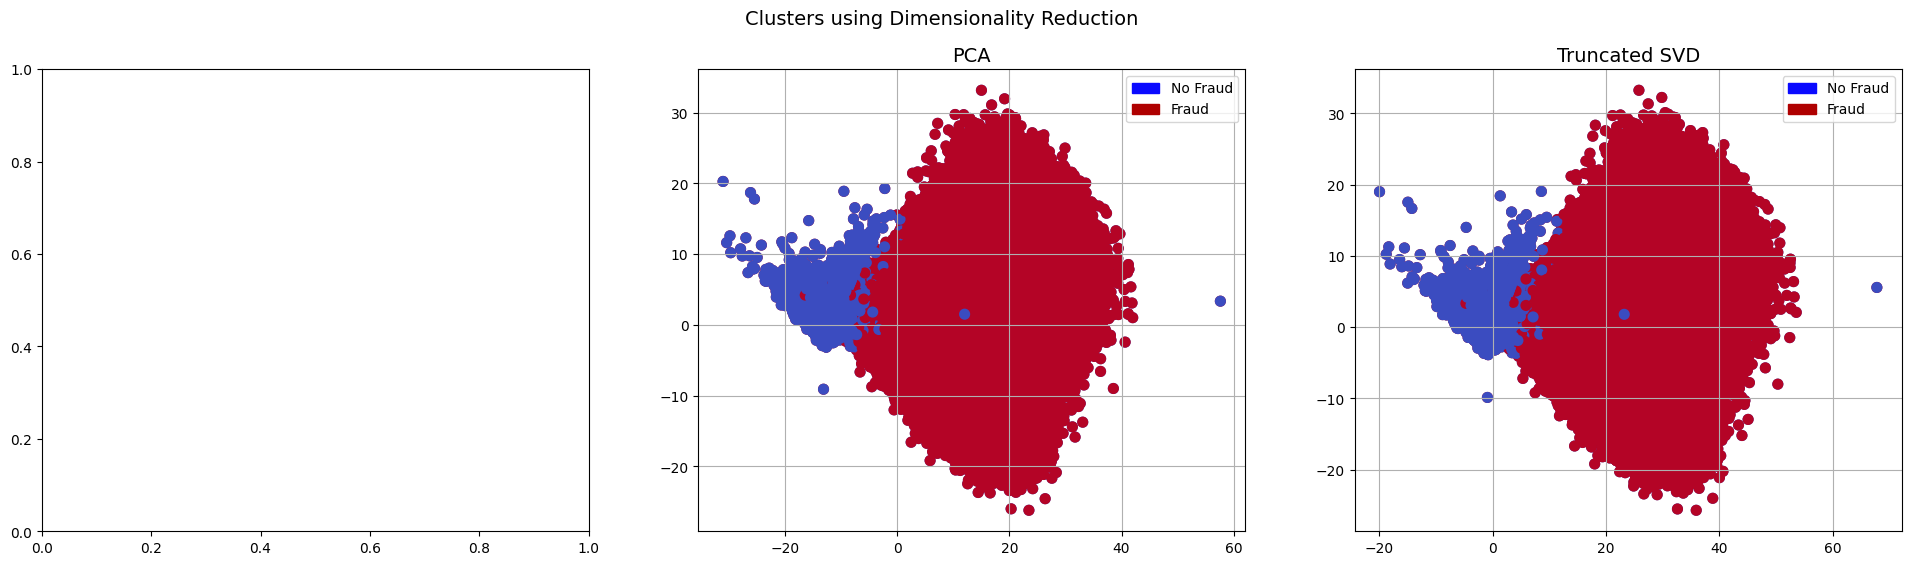

In [26]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


# # t-SNE scatter plot
# ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
# ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
# ax1.set_title('t-SNE', fontsize=14)

# ax1.grid(True)

# ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()